## Step 1 – Import Packages
#### The import keyword is used to make code from one module accessible in another. I may reuse code and keep my project maintainable by using imports effectively, which can increase my productivity.

In [1]:

import pandas as pd # For Data Processing
import numpy as np  # For array
import matplotlib.colors as mcolors # For histogram colors

import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For making statistical graphics


from sklearn.model_selection import train_test_split # For spliting the data
from sklearn.preprocessing import RobustScaler # For feature scaling


from imblearn.under_sampling import RandomUnderSampler # For undersampling
from imblearn.over_sampling import RandomOverSampler # For oversampling

from collections import Counter



from sklearn.linear_model import LogisticRegression # For logistic regression classifier modeling
from xgboost import XGBClassifier  # For XGBoost Classifier modeling
from sklearn.tree import DecisionTreeClassifier , plot_tree # For DecisionTree Classifier modeling
from sklearn.ensemble import RandomForestClassifier# For Random forest classifier



# Importing packages for Cross - validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# For ignoring the warning that come at the time of execution
import warnings
warnings.filterwarnings('ignore') #for ignore warnings



# Importing packages for performance evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay





## Step 2 – Dataset Analysis
### 2.1 Reading CSV data
#### I will read the data from CSV file using pandas, and then print the  first five rows by head() and last five rows of the dataset by tail() methods

In [2]:
#Import the dataset and print the result

creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df.head().append(creditcard_df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Insight of result
#### We can see from the result that time column is a seconds to define the time between the current and first transactions.Amount column define the amount of the transaction. Class 0 indicates Normal Transaction and 1 indicates Abnormal Transactions. 'Time' and 'Amount' are the only features that are not transformed to PCA.

### 2.2 Understanding data
#### In follwing code I have a look at the number of Abnormal and Normal cases in dataset as well as  also calculate the percentage of abnormal cases and normal cases in the total number of recorded transactions. 

In [3]:
# Size of the dataset
creditcard_cases = len(creditcard_df)
print("Total Number of Transactions in creditcard dataset is : ",creditcard_cases,"\n")


# Size of the abnormal and normal transactions
abnormal_transaction = len(creditcard_df[creditcard_df.Class == 1])
normal_transaction = len(creditcard_df[creditcard_df.Class == 0])




# calculating the proportion of abnormal and normal transactions
abnormal_t_percentage = round(abnormal_transaction/creditcard_cases*100,2)
normal_t_percentage = round(normal_transaction/creditcard_cases*100,2)

# Printing all the results
print("The entire credit card dataset's number of abnormal transactions is : ",abnormal_transaction)
print("The entire credit card dataset's number of normal transactions is : ",normal_transaction,"\n")
print("The proportion of abnormal transactions is found in the credit card dataset is : ",abnormal_t_percentage)
print("The proportion of normal transactions is found in the credit card dataset is : ",normal_t_percentage)

Total Number of Transactions in creditcard dataset is :  284807 

The entire credit card dataset's number of abnormal transactions is :  492
The entire credit card dataset's number of normal transactions is :  284315 

The proportion of abnormal transactions is found in the credit card dataset is :  0.17
The proportion of normal transactions is found in the credit card dataset is :  99.83


### 2.3 Summary of dataset
#### The percentile, mean, and standard deviation of the numerical values of the Series or DataFrame are calculated using the describe() method. It examines mixed data type DataFrame column sets as well as numeric and object series.

### 2.3.1 Whole dataset descriptive statistics

In [4]:
creditcard_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2.3.2  Abnormal Amount  data descriptive statistics

In [5]:
# Abnormal transaction amount descriptive statistics calculation by using describe()

abnormal_amount = creditcard_df[creditcard_df['Class'] == 1]
print("Abnormal amount data descriptive statistics Information")
abnormal_amount.Amount.describe()

Abnormal amount data descriptive statistics Information


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### 2.3.3 Normal Amount data descriptive statistics

In [6]:
# Normal transaction amount descriptive statistics calculation by using describe()

normal_amount = creditcard_df[creditcard_df['Class'] == 0]
print("Normal amount data descriptive statistics Information")
normal_amount.Amount.describe()

Normal amount data descriptive statistics Information


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

## Step 3. Data Exploration and Visualization

#### When visualisations and images are employed, understanding is frequently much improved. Problems with machine learning are the same. Exploratory data visualisation is the process of visualising various parts of the information to better understand the data.

### 3.1 Plotting histograms to understand the values of each feature.

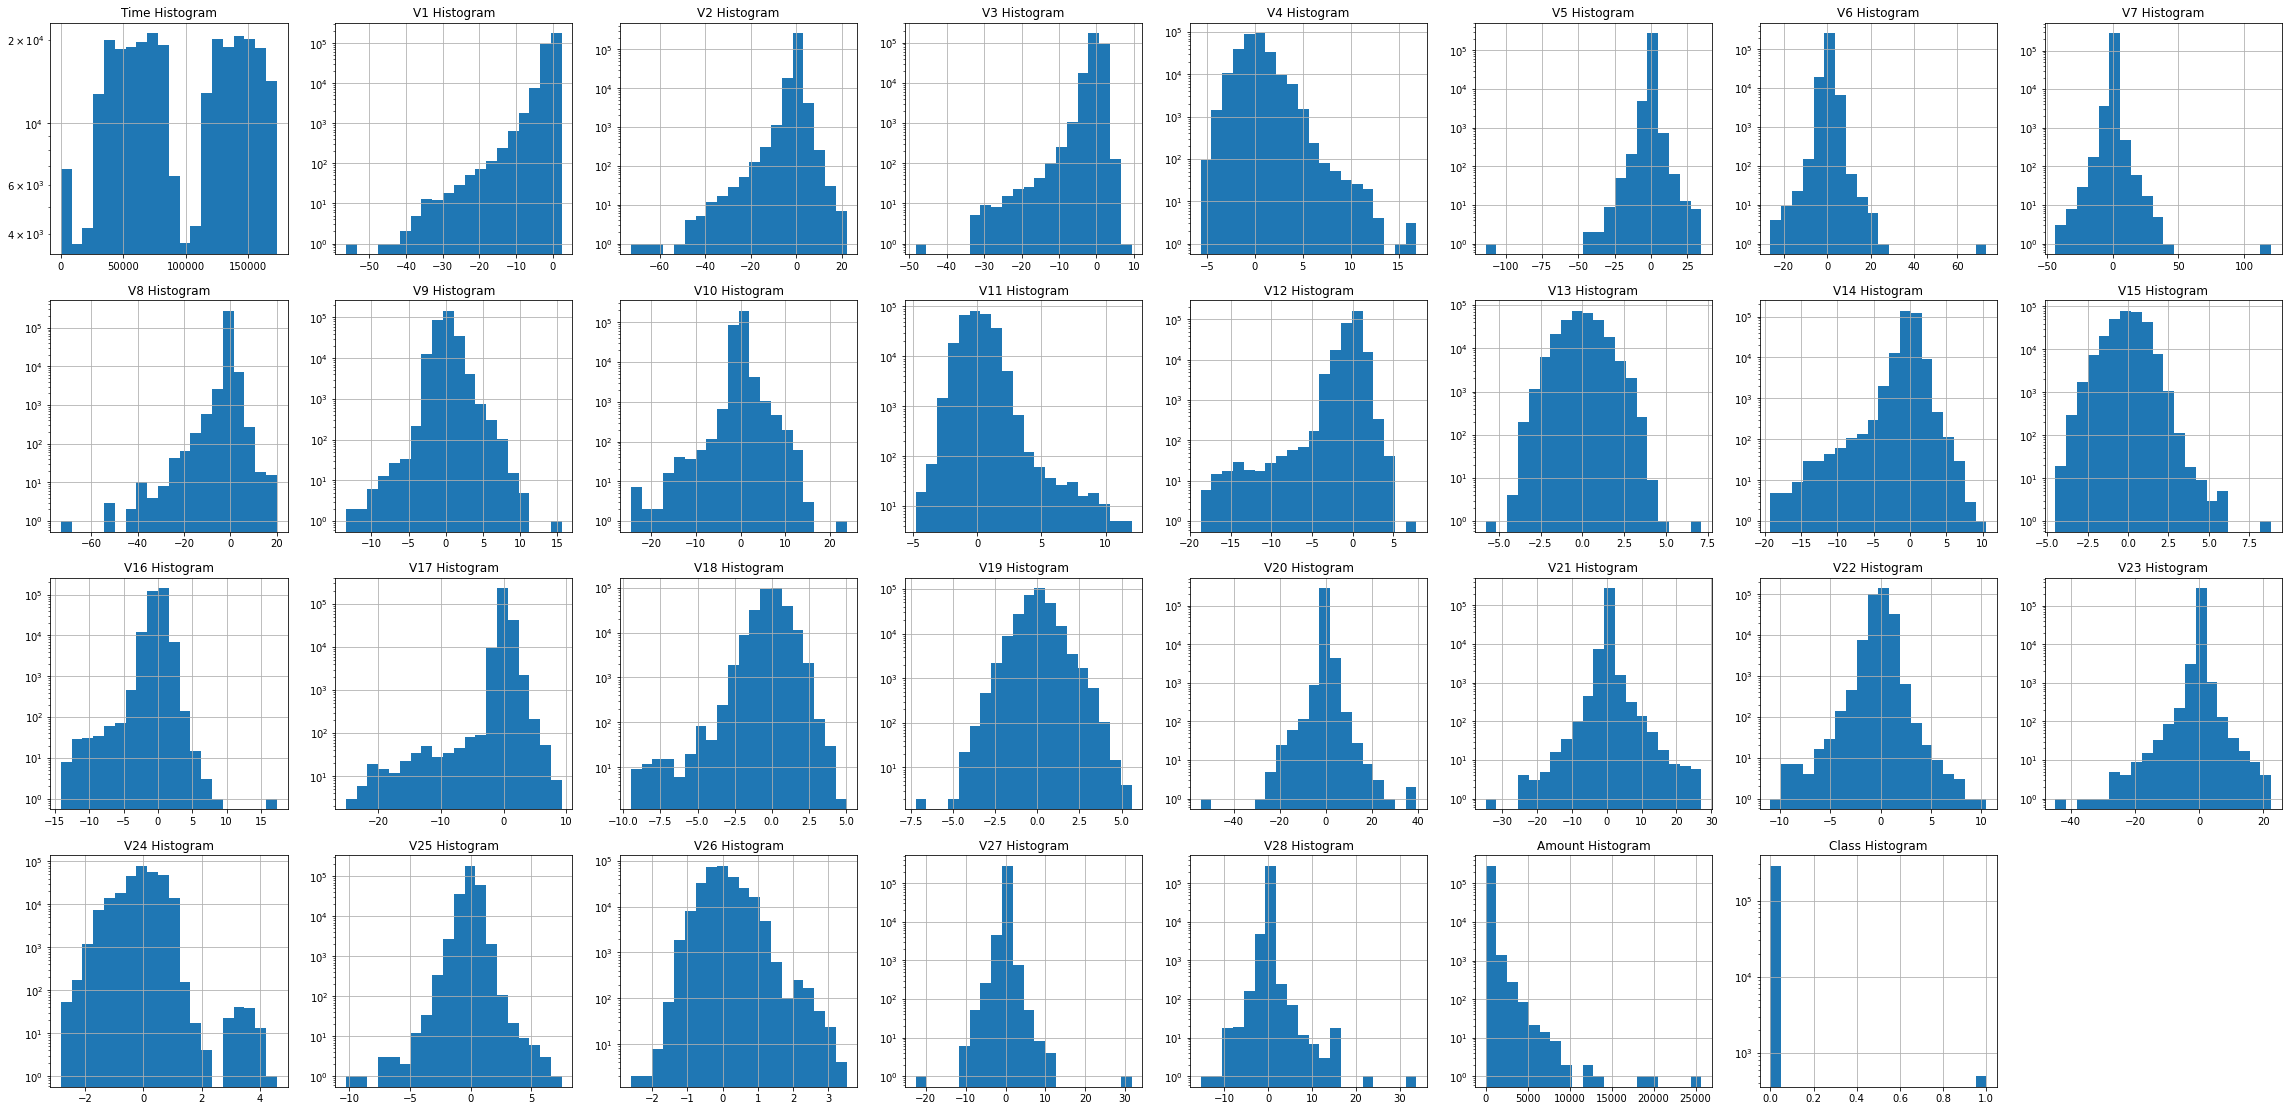

In [7]:
# Define the function

def generate_histogram(creditcard_df, attributes, rows, columns):
    
    cc_hist_fig=plt.figure(figsize=(40,40))
    
    for i, attribute in enumerate(attributes):
        cc_hist_axis=cc_hist_fig.add_subplot(rows,columns,i+1)
        creditcard_df[attribute].hist(bins=20,ax=cc_hist_axis)
        cc_hist_axis.set_title(attribute +" Histogram")
        cc_hist_axis.set_yscale('log')
   # hist_fig.tight_layout() 
   # plt.savefig('Attributes_Histograms.png')
    plt.show()
    
# Calling the function
generate_histogram(creditcard_df,creditcard_df.columns,8,8)


### 3.2 Checking the frequncy of frauds and visualize it by graphs

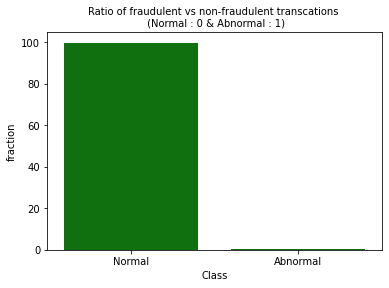

In [8]:
# A bar plot representing the percentage of abnormal and normal transactions

abnormal_bar = {'Class':['Normal', 'Abnormal'], 'fraction':[normal_t_percentage, abnormal_t_percentage]} 
abnormal_df = pd.DataFrame(abnormal_bar) 
sns.barplot(x='Class',y='fraction', data=abnormal_df, color='g')
plt.title('Ratio of fraudulent vs non-fraudulent transcations \n (Normal : 0 & Abnormal : 1)', fontsize=10)
plt.show()


#### The "Time" column will be changed to an Hour.

In [9]:
#Converted time in Hour

creditcard_df["Hourly_Time"] = creditcard_df["Time"]/3600 

### 3.3 Examine the distribution of the Time using "normal" and "abnormal" transactions.

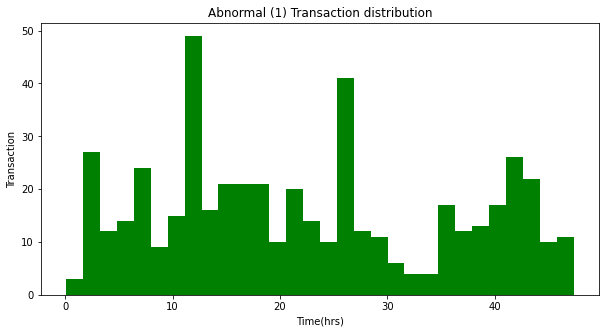

In [10]:
# Plotting the abNormal transaction  dataframe

data_abnormal_plot = creditcard_df[creditcard_df['Class'] == 1]
plt.figure(figsize=(10,5))
plt.hist(data_abnormal_plot['Hourly_Time'], label='abnormal', bins=30 , color='g')
plt.title('Abnormal (1) Transaction distribution')
plt.xlabel('Time(hrs)')
plt.ylabel('Transaction')
 
plt.show()


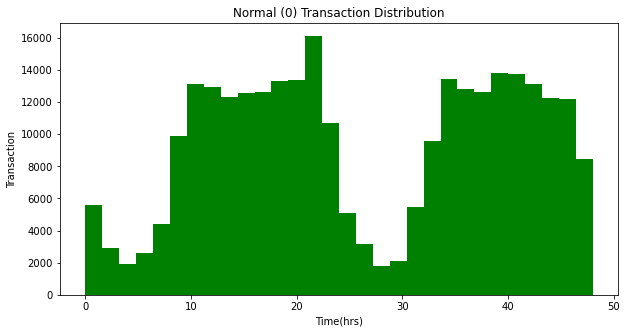

In [11]:
# Plotting the Normal transaction dataframe

data_normal_plot = creditcard_df[creditcard_df['Class'] == 0]
plt.figure(figsize=(10,5))
plt.hist(data_normal_plot['Hourly_Time'], label='normal', bins=30 , color='g')
plt.title('Normal (0) Transaction Distribution')
plt.xlabel('Time(hrs)')
plt.ylabel('Transaction')

plt.show()

### 3.4 Examine the distribution of the Time using "normal" and "abnormal" transactions.

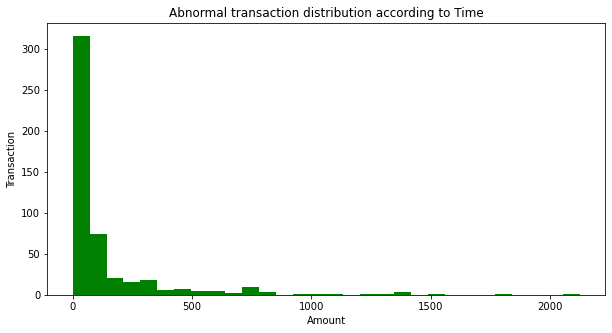

In [12]:
# Plotting the abnormal transaction distribution according to the "Time" 

data_abnormal_time = creditcard_df[creditcard_df['Class'] == 1]
plt.figure(figsize=(10,5))
plt.hist(data_abnormal_time['Amount'], label='abnormal', bins=30 , color='g')
plt.title('Abnormal transaction distribution according to Time')
plt.xlabel('Amount')
plt.ylabel('Transaction')
plt.show()


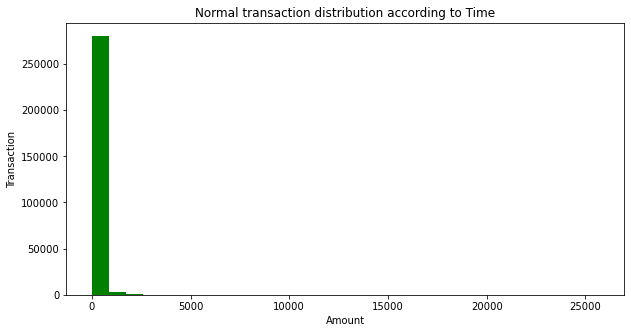

In [13]:
# Plotting the normal transaction distribution according to the "Time"
data_normal_time = creditcard_df[creditcard_df['Class'] == 0]
plt.figure(figsize=(10,5))
plt.hist(data_normal_time['Amount'], label='normal', bins=30 , color='g')
plt.title('Normal transaction distribution according to Time')
plt.xlabel('Amount')
plt.ylabel('Transaction')
plt.show()

### Insight of result
#### I have analyse in above exploration of Amount column that there is a large difference in values of Variable amount and other variable so I wull scale the amount column in follwing implementation. 

## Step 4 Preprocessing the Dataset
#### Preprocessing the data is a crucial step in the analysis because it helps to get rid of duplicates and outliers. Additionally, scaling the columns on a broad basis is a widely accepted technique that promotes faster convergence and produces better outcomes.
#### In following line of code I have Checking for null values in dataset
### 4.1 Data Cleaning and handing Outliers
### 4.1.1 Checking For null values or missing values

In [14]:
# Checking For null values using 'isnull()'

creditcard_df.isnull().values.any()

False

### Insight of Result
####  I have observe that none of the columns have any missing data. As a result, there is no issue with null values across the dataset.
### 4.1.2 Checking about the data duplicancy.

In [15]:
# Checking for the data duplicacy using 'duplicated()''

duplicated_data=sum(creditcard_df.duplicated())
print("Total duplicated data in the dataset is : ", duplicated_data)

Total duplicated data in the dataset is :  1081


### Insight of Result 
#### The dataset has to be cleaned up because there are over 1081 duplicate rows. In order to eliminate the duplicates, use the following line of code:

In [16]:
# Destroying  duplicate data by using the 'drop_duplicates()'

creditcard_df.drop_duplicates(inplace=True)


### 4.1.3 Checking the spread of ‘Time’ and ‘Amount’ for Outliers

Text(0.5, 1.0, 'Approx Amount Distribution')

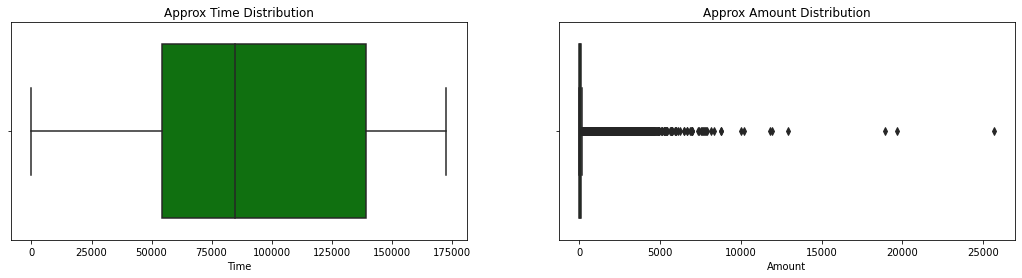

In [17]:
# Plotting the "Amount" and "Time" using Box plot"

figure, ax = plt.subplots(1,2, figsize=(18,4))

sns.boxplot(creditcard_df['Time'], ax=ax[0], color='g')
ax[0].set_title("Approx Time Distribution")

sns.boxplot(creditcard_df['Amount'], ax=ax[1], color='g')
ax[1].set_title("Approx Amount Distribution")

### Insight of result
#### I can see from above result that there is a outliers in the 'Amount' so I have remove it using the IQR method that Outliers were eliminated using the Inter Quantile Range (IQR) approach, which is one of the most used methods for managing outliers
### 4.1.4 Destroying Outliers

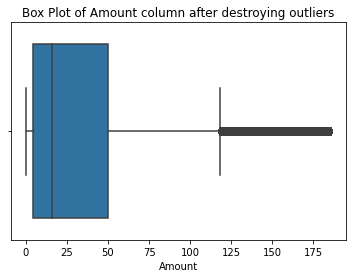

In [18]:
# Define the function for destroying outliers

def destroy_amount_outliers(creditcard_df, column_name):
    
    inter_quartile_range=1.5*(np.percentile(creditcard_df[column_name],75)- np.percentile(creditcard_df[column_name],25))
    creditcard_df.drop(creditcard_df[creditcard_df[column_name]>(inter_quartile_range + np.percentile(creditcard_df[column_name],75))].index, inplace=True)
    creditcard_df.drop(creditcard_df[creditcard_df[column_name]<(np.percentile(creditcard_df[column_name],25)-inter_quartile_range)].index, inplace=True)

# Call the function    
destroy_amount_outliers(creditcard_df,'Amount')

# Plotting the Amount Column by Box Plot
ax=sns.boxplot(creditcard_df['Amount'])
ax.set_title("Box Plot of Amount column after destroying outliers")

plt.show()

## 4.2 Feature Scaling
####  To scale amount variable I have used robust scalar() 

In [19]:
# Doing scaling of amount column and create new column named  "resize_amount"

creditcard_df['resize_amount']=RobustScaler().fit_transform(creditcard_df['Amount'].values.reshape(-1,1))
creditcard_df.head().append(creditcard_df.tail())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hourly_Time,resize_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000,2.935399
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000,-0.293122
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278,2.361459
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556,1.185673
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0.000556,-0.271589
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0,47.995833,-0.293122
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,47.996111,-0.335311
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,47.996389,0.192485
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,47.996667,1.139310
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,47.996667,-0.132498


## 4.3 Feature Correlation
#### It is also a common practice to observe the dependency of variables on each other by studying their correlation. A very interesting and meaningful visualization called Heatmap can be plotted that gives this very information. It can be plotted by using code given below:


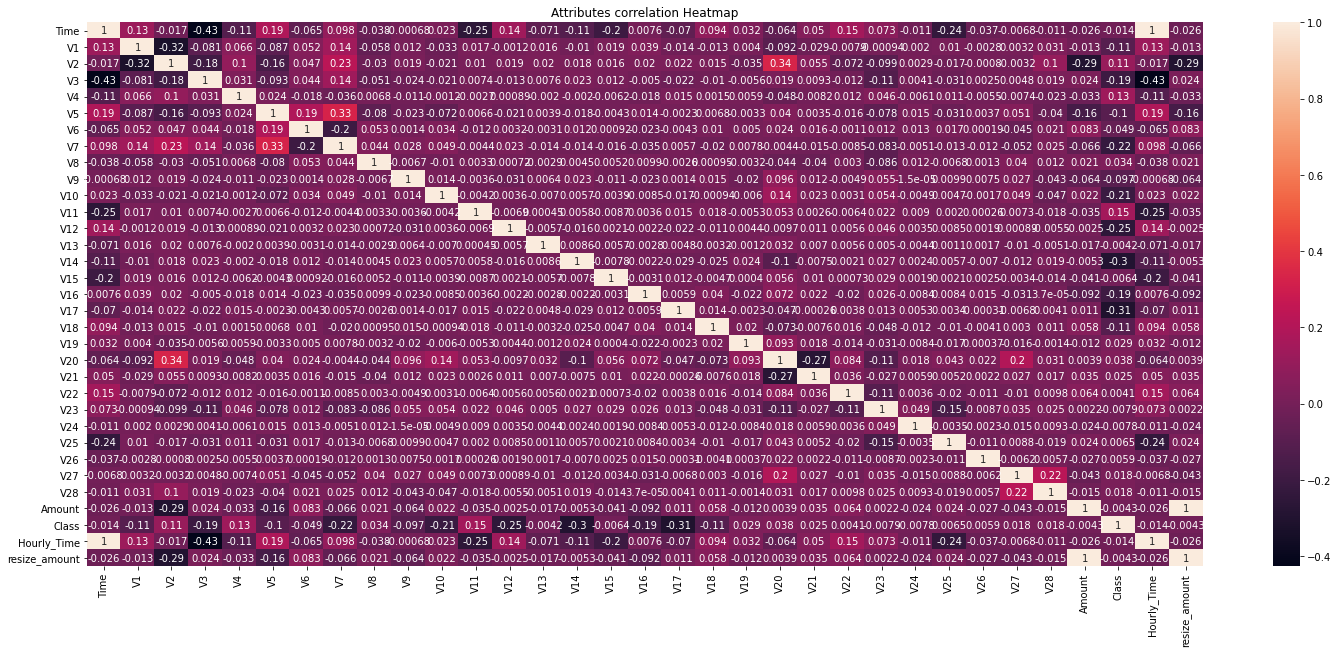

In [20]:
# Plotting the relationship of each attributes by the use of heatmap

f,ax = plt.subplots(1, 1, figsize=(25, 10))

sns.heatmap(creditcard_df.corr(),annot=True )
ax.set_title('Attributes correlation Heatmap')

plt.show()

### Insight of result
#### I've noticed that there isn't a clear trend in the number of anomalous or regular transactions over time so I have remove Time column. Because I had scaled a feature on the Amount column and had created a new column called "scaled amount" in the following code, I had to remove "Amount" column as a result.
#### Destroying  the 'Time' and 'Amount' Column

In [21]:
# Destroying the "Time" and "Amount" columns

creditcard_df.drop('Time', axis=1, inplace=True)
creditcard_df.drop('Amount', axis=1, inplace=True)


## 4.4 Train - Test Split
#### A model validation process called train-test-split indicates how well your model works with fresh data.

In [22]:
# Intializing feature variables into X
feature_X = creditcard_df.drop(['Class'], axis=1)

# Intializing target variables to y
target_Y = creditcard_df['Class']

# Splitting data into train and test set 70:30
X_train_data, X_test_data, Y_train_data, Y_test_data = train_test_split(feature_X, target_Y, test_size=0.20, random_state=42)

print("The size for the train data of the feature variable X Is   : ",X_train_data.shape)
print("The size for the train data of the target variable Y Is : ",Y_train_data.shape)
print("The size for the test data of the feature variable X Is : ",X_test_data.shape)
print("The size for the test data of the target variable Y Is : ",Y_test_data.shape)


The size for the train data of the feature variable X Is   :  (201632, 30)
The size for the train data of the target variable Y Is :  (201632,)
The size for the test data of the feature variable X Is :  (50409, 30)
The size for the test data of the target variable Y Is :  (50409,)


### After splitting the dataset, we have 201632 observations in the training subset and 50409 in the test subset.

In [23]:
# Detailing for the  feature variable X's columns using column attribute

X_train_cols = X_train_data.columns
X_train_cols



Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Hourly_Time',
       'resize_amount'],
      dtype='object')

## Step 5 ModelBuilding

### 5.1 Dataframe for performance evaluation metrics 

In [24]:
# Creating the dataframe for storing the results of imbalanced dataset  performance metrics of train data and test data
 
imb_train_results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])

imb_test_results = pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])



### 5.2 Creating ROC Curve function

In [25]:

# Define the function for later use 
def draw_roc( actual_data, prob_data ):
    fpr, tpr, thresholds = metrics.roc_curve( actual_data, prob_data, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual_data, prob_data )
    plt.figure(figsize=(7,7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
 
    
    return None

### 5.3 Creating functions for imbalance dataset

### 5.3.1 Define the train results function for imbalanced dataset

In [26]:
# Define the function for train_results 

def imb_train_modeling(model_name,imbalance_model):
    

    # Estimation of the train set data
    Y_train_pred_data = imbalance_model.predict(X_train_data)
    
    # Generating Confusion matrix
    print("**********Confusion Matrix**********")
    confusion_train = metrics.confusion_matrix(Y_train_data, Y_train_pred_data)
    print(confusion_train)
    
    # Displaying Confusion matrix
    confusion_matrix_train = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_train)
    confusion_matrix_train.plot(cmap=plt.cm.Blues)
    plt.show()
          
          
    # Generating Classification report for the train data    
    print("**********classification_report**********")
    TP = confusion_train[1,1] 
    TN = confusion_train[0,0] 
    FP = confusion_train[0,1] 
    FN = confusion_train[1,0] 

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_train_data, Y_train_pred_data))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_train_data, Y_train_pred_data))

    # classification_report
    print(classification_report(Y_train_data, Y_train_pred_data))
    
    
    
    
    
    # Predicted probability
    Y_train_pred_prob = imbalance_model.predict_proba(X_train_data)[:,1]
   

     # roc_auc
    print("**********ROC**********")
    roc_auc = metrics.roc_auc_score(Y_train_data, Y_train_pred_prob)
    
    # Plotting the ROC curve
    draw_roc(Y_train_data, Y_train_pred_prob)
    
   
    
    
    # Performance Evaluation metrics score in final result store
    imb_train_results.loc[len(imb_train_results)] = [model_name, metrics.accuracy_score(Y_train_data, Y_train_pred_data), f1_score(Y_train_data, Y_train_pred_data), roc_auc]

    
    return None

### 5.3.2 Define the test results function for imbalanced dataset

In [27]:
# Define the function for train_results 

def imb_test_modeling(model_name,imbalance_model):
    

    
    # Estimation on the train set data
    Y_test_pred_data = imbalance_model.predict(X_test_data)
    
    # Generatinng Confusion matrix
    print("**********Confusion Matrix**********")

    confusion_test = metrics.confusion_matrix(Y_test_data, Y_test_pred_data)
    print(confusion_test)
    
    # Displaying Confusion matrix
    confusion_matrix_test = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_test)
    confusion_matrix_test.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print("**********Classification_report**********")
    TP = confusion_test[1,1] 
    TN = confusion_test[0,0] 
    FP = confusion_test[0,1] 
    FN = confusion_test[1,0] 

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_test_data, Y_test_pred_data))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_test_data, Y_test_pred_data))

    # classification_report
    print(classification_report(Y_test_data, Y_test_pred_data))
    
    # Predicted probability
    Y_test_pred_prob = imbalance_model.predict_proba(X_test_data)[:,1]
    
    # roc_auc
    print("**********ROC**********")
    roc_auc = metrics.roc_auc_score(Y_test_data, Y_test_pred_prob)
    
    
    # Plotting the ROC curve
    draw_roc(Y_test_data, Y_test_pred_prob)
    
    
    # Performance Evaluation metrics score in final result store
    imb_test_results.loc[len(imb_test_results)] = [model_name, metrics.accuracy_score(Y_test_data, Y_test_pred_data), f1_score(Y_test_data, Y_test_pred_data), roc_auc]

    
        
    return None

### 5.3.3 Creating stratifield for Cross validation

In [29]:
# Define the number of folds for cross validation
folds_number = 3 

# Define the cross-validation
sk_fold = StratifiedKFold(n_splits=folds_number, shuffle=True, random_state=42)


### 5.4 Model building with Imbalanced Dataset
### 5.4.1 Logistic Regression

#### Here I have used a GridSearchCV which is a method for looking through the grid of parameters' appropriate parameter estimates from the given set.

In [30]:
model = LogisticRegression()
model.fit(X_train_data, Y_train_data)
result = model.score(X_test_data, Y_test_data)
print("Accuracy without Cross Validation : %.2f%%" % (result*100.0))

Accuracy without Cross Validation : 99.90%


In [31]:




# Identify the hyperparamaters
parameters = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}


lr_imb_model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid = parameters, 
                        scoring= 'roc_auc', 
                        cv = sk_fold, 
                        verbose = 3,
                        return_train_score=True,
                       ) 
# Fit the logistic regression model
lr_imb_model_cv.fit(X_train_data, Y_train_data)



Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV 1/3] END .......C=0.001;, score=(train=0.988, test=0.978) total time=   0.3s
[CV 2/3] END .......C=0.001;, score=(train=0.980, test=0.991) total time=   0.3s
[CV 3/3] END .......C=0.001;, score=(train=0.985, test=0.982) total time=   0.3s
[CV 1/3] END ........C=0.01;, score=(train=0.986, test=0.982) total time=   0.6s
[CV 2/3] END ........C=0.01;, score=(train=0.982, test=0.989) total time=   0.6s
[CV 3/3] END ........C=0.01;, score=(train=0.988, test=0.978) total time=   0.7s
[CV 1/3] END .........C=0.1;, score=(train=0.979, test=0.986) total time=   0.9s
[CV 2/3] END .........C=0.1;, score=(train=0.977, test=0.982) total time=   0.9s
[CV 3/3] END .........C=0.1;, score=(train=0.988, test=0.967) total time=   0.9s
[CV 1/3] END ...........C=1;, score=(train=0.976, test=0.985) total time=   0.9s
[CV 2/3] END ...........C=1;, score=(train=0.973, test=0.978) total time=   1.0s
[CV 3/3] END ...........C=1;, score=(train=0.987,

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [32]:
# results of grid search CV
lr_imb_cv_results = pd.DataFrame(lr_imb_model_cv.cv_results_)
lr_imb_cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.390366,0.018742,0.027206,0.001967,0.001,{'C': 0.001},0.977848,0.991464,0.981697,0.983670,0.005731,1,0.987869,0.980398,0.984611,0.984293,0.003058
1,0.712968,0.036267,0.022314,0.000271,0.01,{'C': 0.01},0.981689,0.988864,0.978397,0.982983,0.004370,2,0.985852,0.982031,0.987640,0.985174,0.002339
2,1.014256,0.007194,0.023147,0.001723,0.1,{'C': 0.1},0.985513,0.981896,0.966529,0.977979,0.008230,3,0.979200,0.976524,0.988182,0.981302,0.004986
3,1.012821,0.039195,0.024018,0.001652,1,{'C': 1},0.985279,0.978198,0.959384,0.974287,0.010927,4,0.975866,0.973088,0.986784,0.978579,0.005911
4,0.957001,0.015591,0.024270,0.002607,10,{'C': 10},0.985264,0.977647,0.958627,0.973846,0.011201,5,0.975543,0.972545,0.986841,0.978310,0.006155
5,1.087228,0.061433,0.023132,0.001569,100,{'C': 100},0.984908,0.976837,0.959339,0.973695,0.010672,7,0.975227,0.972065,0.987338,0.978210,0.006582
6,1.020136,0.035783,0.022143,0.001656,1000,{'C': 1000},0.984707,0.977753,0.958658,0.973706,0.011013,6,0.975528,0.972802,0.986343,0.978224,0.005848


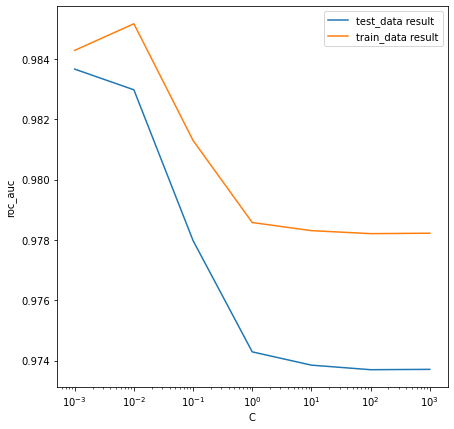

In [33]:
# C vs train and validation scores plotted

plt.figure(figsize=(7,7))
plt.plot(lr_imb_cv_results['param_C'], lr_imb_cv_results['mean_test_score'])
plt.plot(lr_imb_cv_results['param_C'], lr_imb_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test_data result', 'train_data result'], loc='upper right')
plt.xscale('log')


In [34]:
# Highest score with a C

lr_imb_best_score = lr_imb_model_cv.best_score_
lr_imb_best_C = lr_imb_model_cv.best_params_['C']

print(" The roc auc test's maximum score is {0} at C = {1}".format(lr_imb_best_score, lr_imb_best_C))

 The roc auc test's maximum score is 0.983669718648217 at C = 0.001


### Logistic regression with optimum solution value of c which is 0.001

In [36]:
# Using the best C to instantiate the model.
logistic_imbalance = LogisticRegression(C=0.001)

# Fitting the model on the train set data
logistic_imbalance_model = logistic_imbalance.fit(X_train_data, Y_train_data)


### 5.4.1.1 Call the train_result function for diplaying result

**********Confusion Matrix**********
[[201299     31]
 [   152    150]]


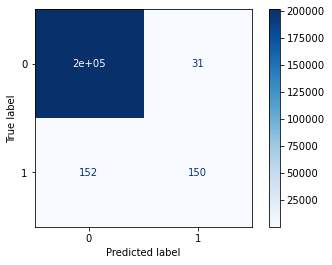

**********classification_report**********
Accuracy:- 0.9990924059673068
Sensitivity:- 0.4966887417218543
Specificity:- 0.9998460239407937
F1-Score:- 0.6211180124223602
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    201330
           1       0.83      0.50      0.62       302

    accuracy                           1.00    201632
   macro avg       0.91      0.75      0.81    201632
weighted avg       1.00      1.00      1.00    201632

**********ROC**********


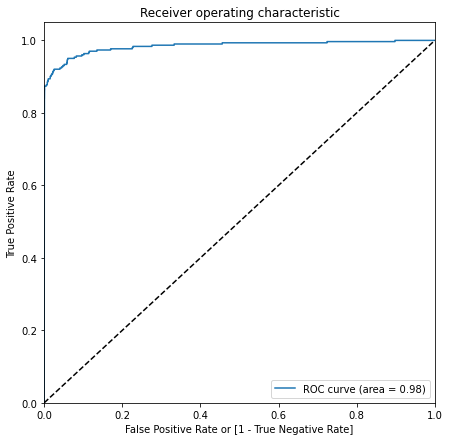

In [37]:
imb_train_modeling("Logistic Regression", logistic_imbalance_model)

### 5.4.1.1 Call the test_result function for diplaying result

**********Confusion Matrix**********
[[50321     4]
 [   54    30]]


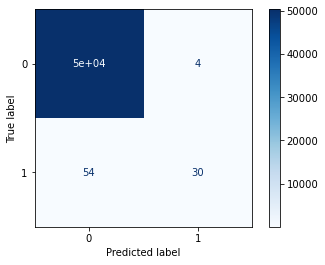

**********Classification_report**********
Accuracy:- 0.9988494118113829
Sensitivity:- 0.35714285714285715
Specificity:- 0.9999205166418281
F1-Score:- 0.5084745762711864
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.88      0.36      0.51        84

    accuracy                           1.00     50409
   macro avg       0.94      0.68      0.75     50409
weighted avg       1.00      1.00      1.00     50409

**********ROC**********


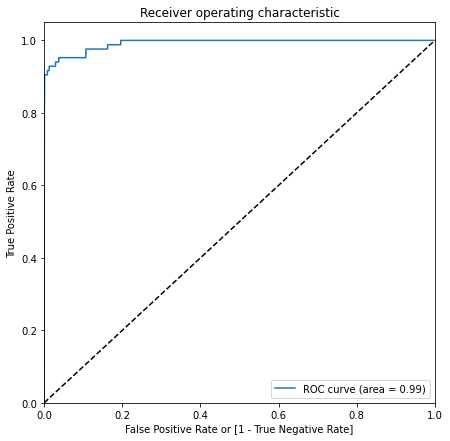

In [38]:
imb_test_modeling("Logistic Regression", logistic_imbalance_model)


### 5.4.2 Decision Tree

In [39]:
#The parameter grid's creation
parameter_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Construct the grid search model 
dt_imb_model_cv = GridSearchCV(estimator = DecisionTreeClassifier(), 
                           param_grid = parameter_grid, 
                           scoring= 'roc_auc',
                           cv = sk_fold, 
                           verbose = 3)
# Fitting  the grid search for the data
dt_imb_model_cv.fit(X_train_data,Y_train_data)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=0.950 total time=   2.4s
[CV 2/3] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=0.931 total time=   2.5s
[CV 3/3] END max_depth=5, min_samples_leaf=50, min_samples_split=50;, score=0.910 total time=   2.4s
[CV 1/3] END max_depth=5, min_samples_leaf=50, min_samples_split=100;, score=0.950 total time=   2.7s
[CV 2/3] END max_depth=5, min_samples_leaf=50, min_samples_split=100;, score=0.931 total time=   2.4s
[CV 3/3] END max_depth=5, min_samples_leaf=50, min_samples_split=100;, score=0.910 total time=   2.4s
[CV 1/3] END max_depth=5, min_samples_leaf=100, min_samples_split=50;, score=0.963 total time=   2.4s
[CV 2/3] END max_depth=5, min_samples_leaf=100, min_samples_split=50;, score=0.952 total time=   2.6s
[CV 3/3] END max_depth=5, min_samples_leaf=100, min_samples_split=50;, score=0.931 total time=   2.4s
[CV 1/3] END max_depth=5,

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=3)

In [40]:
# cross validation results for decision tree
dt_imb_cv_results = pd.DataFrame(dt_imb_model_cv.cv_results_)
dt_imb_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2.511636,0.057609,0.022643,0.004089,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.950110,0.930578,0.909671,0.930120,0.016512,5
1,2.576638,0.156825,0.016279,0.000470,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.950085,0.930590,0.909671,0.930115,0.016502,6
2,2.542640,0.111898,0.016611,0.000940,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.962853,0.952112,0.930552,0.948506,0.013431,3
3,2.580973,0.181205,0.016786,0.001189,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.962849,0.952112,0.930552,0.948505,0.013430,4
4,5.104863,0.076502,0.024853,0.004237,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.977437,0.970490,0.935751,0.961226,0.018236,1
5,5.001440,0.093413,0.019599,0.002488,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.967572,0.970475,0.935717,0.957922,0.015745,2
6,5.003912,0.310228,0.018599,0.001232,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.952722,0.928319,0.892764,0.924602,0.024619,8
7,4.942381,0.207492,0.018272,0.000470,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.952682,0.918988,0.902497,0.924722,0.020886,7


In [41]:
# The best sensitivity score and hyperparameters are printed
print("Best roc_auc score is : ", dt_imb_model_cv.best_score_)
print(dt_imb_model_cv.best_estimator_)

Best roc_auc score is :  0.9612260767873836
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [42]:
# hyperparameter-optimal model
dtree_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 10,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dtree_imb_model.fit(X_train_data, Y_train_data)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=10)

### 5.4.2.1 Call the train_result function for displaying result of predection on train data

**********Confusion Matrix**********
[[201293     37]
 [   108    194]]


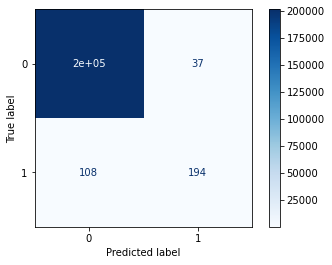

**********classification_report**********
Accuracy:- 0.999280868116172
Sensitivity:- 0.6423841059602649
Specificity:- 0.9998162221228828
F1-Score:- 0.7279549718574109
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    201330
           1       0.84      0.64      0.73       302

    accuracy                           1.00    201632
   macro avg       0.92      0.82      0.86    201632
weighted avg       1.00      1.00      1.00    201632

**********ROC**********


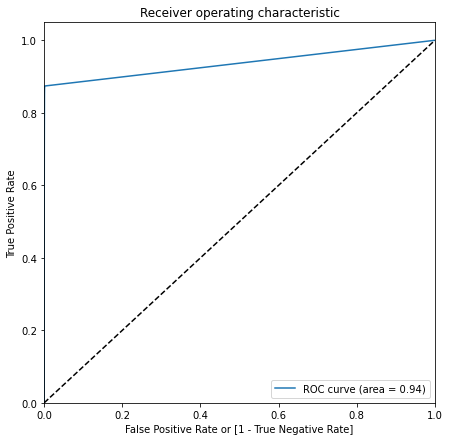

In [43]:
imb_train_modeling("Decision Tree", dtree_imb_model)

### 5.4.2.2 Call the test_result function for displaying result of prediction of test data

**********Confusion Matrix**********
[[50317     8]
 [   31    53]]


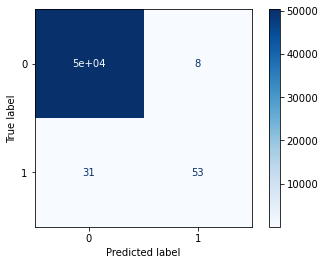

**********Classification_report**********
Accuracy:- 0.999226328631792
Sensitivity:- 0.6309523809523809
Specificity:- 0.9998410332836563
F1-Score:- 0.7310344827586208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.87      0.63      0.73        84

    accuracy                           1.00     50409
   macro avg       0.93      0.82      0.87     50409
weighted avg       1.00      1.00      1.00     50409

**********ROC**********


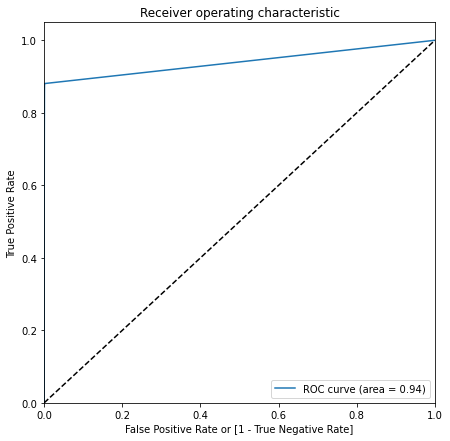

In [44]:
imb_test_modeling("Decision Tree",dtree_imb_model)

### 5.4.3 XGBoost 

In [45]:
# Establish the hyperparameter range
parameter_grid = {'learning_rate': [0.4, 0.8], 
             'subsample': [0.3, 0.6, 0.9]}          


# Emphasise the model
xgb_imb_model = XGBClassifier(max_depth=3, n_estimators=300)

# configure GridSearchCV ()
xgb_imb_model_cv = GridSearchCV(estimator = xgb_imb_model, 
                        param_grid = parameter_grid, 
                        scoring= 'roc_auc', 
                        cv = sk_fold, 
                        verbose = 3,
                        return_train_score=True)      

# fitting the model
xgb_imb_model_cv.fit(X_train_data, Y_train_data)       


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END learning_rate=0.4, subsample=0.3;, score=(train=1.000, test=0.976) total time=  13.0s
[CV 2/3] END learning_rate=0.4, subsample=0.3;, score=(train=1.000, test=0.984) total time=  15.3s
[CV 3/3] END learning_rate=0.4, subsample=0.3;, score=(train=1.000, test=0.954) total time=  16.8s
[CV 1/3] END learning_rate=0.4, subsample=0.6;, score=(train=1.000, test=0.980) total time=  23.2s
[CV 2/3] END learning_rate=0.4, subsample=0.6;, score=(train=1.000, test=0.988) total time=  23.1s
[CV 3/3] END learning_rate=0.4, subsample=0.6;, score=(train=1.000, test=0.969) total time=  21.5s
[CV 1/3] END learning_rate=0.4, subsample=0.9;, score=(train=1.000, test=0.978) total time=  27.1s
[CV 2/3] END learning_rate=0.4, subsample=0.9;, score=(train=1.000, test=0.989) total time=  27.9s
[CV 3/3] END learning_rate=0.4, subsample=0.9;, score=(train=1.000, test=0.963) total time=  26.6s
[CV 1/3] END learning_rate=0.8, subsample=0.3;, s

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.4, 0.8],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=3)

In [46]:
# Cross validation results for XGBoost model
xgb_imb_cv_results = pd.DataFrame(xgb_imb_model_cv.cv_results_)
xgb_imb_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,15.038507,1.545163,0.091599,0.004434,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.975631,0.984005,0.954407,0.971348,0.012457,4,1.0,1.0,1.0,1.0,0.000000e+00
1,22.569873,0.762774,0.099644,0.005505,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.979612,0.988189,0.968900,0.978900,0.007891,1,1.0,1.0,1.0,1.0,0.000000e+00
2,27.210862,0.521963,0.098893,0.004134,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.978227,0.988942,0.962956,0.976708,0.010663,2,1.0,1.0,1.0,1.0,0.000000e+00
3,14.691334,0.793133,0.086675,0.008419,0.8,0.3,"{'learning_rate': 0.8, 'subsample': 0.3}",0.980992,0.978514,0.949760,0.969755,0.014175,6,1.0,1.0,1.0,1.0,3.494704e-08
4,18.193823,1.133620,0.090448,0.003677,0.8,0.6,"{'learning_rate': 0.8, 'subsample': 0.6}",0.982066,0.984653,0.959262,0.975327,0.011409,3,1.0,1.0,1.0,1.0,0.000000e+00
5,20.496837,0.864924,0.081216,0.001308,0.8,0.9,"{'learning_rate': 0.8, 'subsample': 0.9}",0.978341,0.982294,0.952758,0.971131,0.013092,5,1.0,1.0,1.0,1.0,0.000000e+00


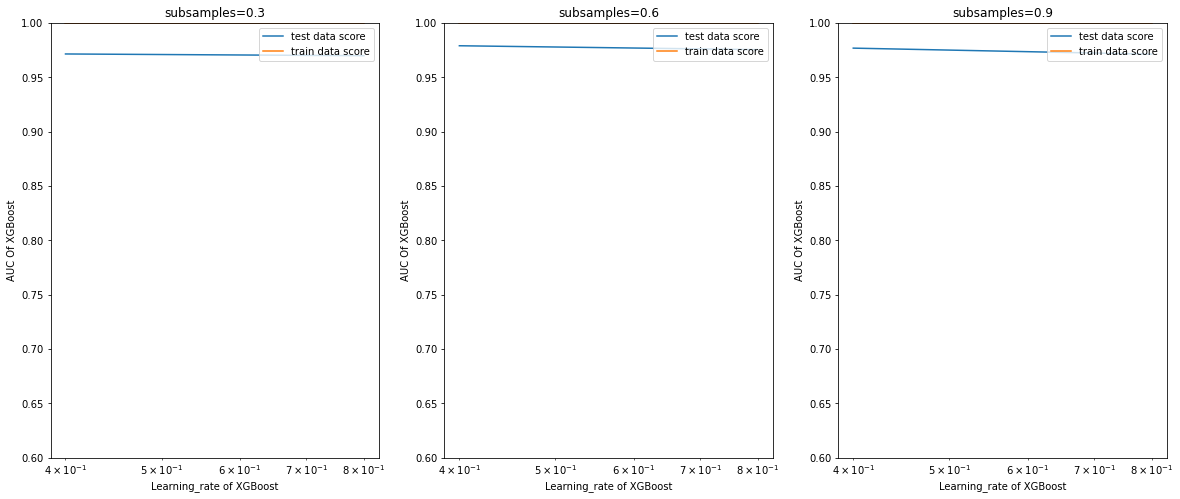

In [47]:
# Define the plot size 
plt.figure(figsize=(20,8))

parameter_grid = {'learning_rates': [0.4, 0.8], 
             'subsamples': [0.3, 0.6, 0.9]} 


for i, xgb_imb_subsample in enumerate(parameter_grid['subsamples']):
    

    # plotting the subplot 
    plt.subplot(1,len(parameter_grid['subsamples']), i+1)
    creditcard_df = xgb_imb_cv_results[xgb_imb_cv_results['param_subsample']==xgb_imb_subsample]

    plt.plot(creditcard_df["param_learning_rate"], creditcard_df["mean_test_score"])
    plt.plot(creditcard_df["param_learning_rate"], creditcard_df["mean_train_score"])
    plt.xlabel('Learning_rate of XGBoost')
    plt.ylabel('AUC Of XGBoost')
    plt.title("subsamples={0}".format(xgb_imb_subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test data score', 'train data score'], loc='upper right')
    plt.xscale('log')

In [48]:
xgb_imb_model_cv.best_params_

{'learning_rate': 0.4, 'subsample': 0.6}

In [49]:
# specified hyperparameters
parameters = {'learning_rate': 0.4,
          'max_depth': 3, 
          'n_estimators':300,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fitting  the model on training data
xgb_imb_model = XGBClassifier(params = parameters)
xgb_imb_model.fit(X_train_data, Y_train_data)

[08:41:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

### 5.4.3.1 Call the train_result function for diplaying result of prediction on train data

**********Confusion Matrix**********
[[201330      0]
 [     0    302]]


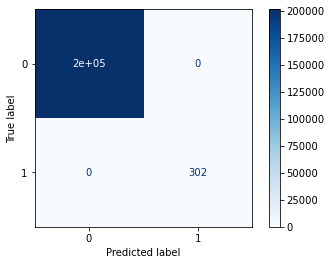

**********classification_report**********
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    201330
           1       1.00      1.00      1.00       302

    accuracy                           1.00    201632
   macro avg       1.00      1.00      1.00    201632
weighted avg       1.00      1.00      1.00    201632

**********ROC**********


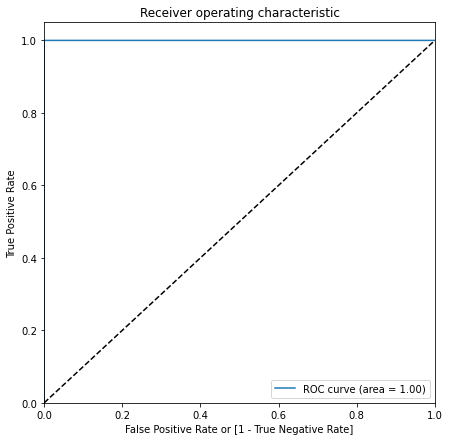

In [50]:
imb_train_modeling("XGBoost", xgb_imb_model)

### 5.4.3.2 Call the test_result function for diplaying result

**********Confusion Matrix**********
[[50324     1]
 [   15    69]]


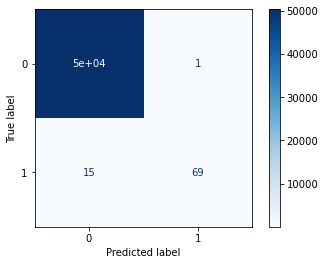

**********Classification_report**********
Accuracy:- 0.9996825963617608
Sensitivity:- 0.8214285714285714
Specificity:- 0.999980129160457
F1-Score:- 0.8961038961038961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.99      0.82      0.90        84

    accuracy                           1.00     50409
   macro avg       0.99      0.91      0.95     50409
weighted avg       1.00      1.00      1.00     50409

**********ROC**********


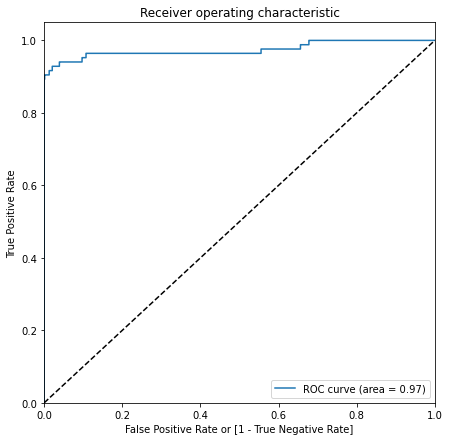

In [51]:
imb_test_modeling("XGBoost", xgb_imb_model)

In [52]:
imb_train_results.sort_values(by='ROC', ascending=False)



,Model Name,Accuracy,F1-score,ROC
2,XGBoost,1.000000,1.000000,1.000000
0,Logistic Regression,0.999092,0.621118,0.984213
1,Decision Tree,0.999281,0.727955,0.937013


In [53]:

imb_test_results.sort_values(by='ROC', ascending=False)


,Model Name,Accuracy,F1-score,ROC
0,Logistic Regression,0.998849,0.508475,0.991998
2,XGBoost,0.999683,0.896104,0.974203
1,Decision Tree,0.999226,0.731034,0.940416


<AxesSubplot:xlabel='Model Name'>

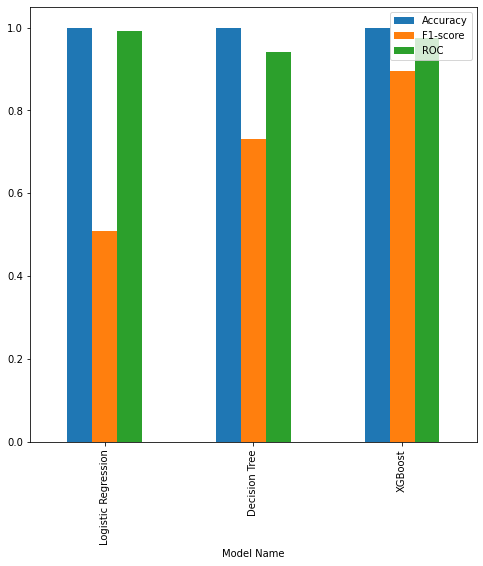

In [54]:

scores_df = pd.DataFrame(imb_test_results)
scores_df.plot(x='Model Name',kind='bar',figsize=(8, 8))



## 5.5 UnderSampling

Imbalanced dataset shape Is : Counter({0: 201330, 1: 302})
Undersampling dataset shape Is:  Counter({0: 302, 1: 302})


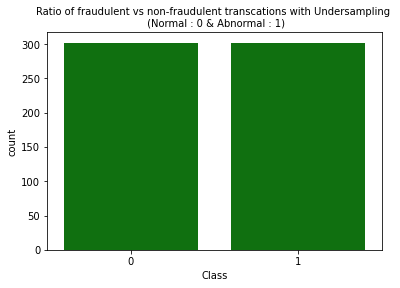

In [55]:
# Fitting the feature and target variable 
ru_sampling = RandomUnderSampler(random_state=30)
X_train_us, Y_train_us = ru_sampling.fit_resample(X_train_data, Y_train_data)


print('Imbalanced dataset shape Is :', Counter(Y_train_data))
print('Undersampling dataset shape Is: ', Counter(Y_train_us))



undersample_df = pd.DataFrame(Y_train_us) 
sns.countplot(x='Class', data=undersample_df, color='g')
plt.title('Ratio of fraudulent vs non-fraudulent transcations with Undersampling \n (Normal : 0 & Abnormal : 1)', fontsize=10)
plt.show()


In [56]:
# Creating the dataframe for storing the results of undersampled dataset performance metrics of train data and test data
rus_train_results= pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])
rus_test_results=pd.DataFrame(columns=['Model Name','Accuracy','F1-score','ROC'])

### 5.5.1 Define the train results function for undersampling dataset

In [57]:
# Define the function for train_results 
def rus_train_modeling(model_name,undersample_model):
    
    
    # Estimation of the train set data
    Y_train_us_pred_data = undersample_model.predict(X_train_us)
    
    # Generating Confusion matrix
    print("**********Confusion Matrix**********")
    confusion_train_us = metrics.confusion_matrix(Y_train_us, Y_train_us_pred_data)
    print(confusion_train_us)
    
    # Displaying Confusion matrix
    cm_train_us = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_train_us )
    cm_train_us.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print("**********Classification_report**********")
    TP = confusion_train_us[1,1] 
    TN = confusion_train_us[0,0] 
    FP = confusion_train_us[0,1] 
    FN = confusion_train_us[1,0] 

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_train_us, Y_train_us_pred_data))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_train_us, Y_train_us_pred_data))

    # classification_report
    print(classification_report(Y_train_us, Y_train_us_pred_data))
    
    # Predicted probability
    Y_train_pred_us_prob = undersample_model.predict_proba(X_train_us)[:,1]
    
     # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(Y_train_us, Y_train_pred_us_prob)
    
    # Plotting the ROC curve
    draw_roc(Y_train_us, Y_train_pred_us_prob)
    
    
    # Performance Evaluation metrics score in final result store for train data
    rus_train_results.loc[len(rus_train_results)] = [model_name, metrics.accuracy_score(Y_train_us, Y_train_us_pred_data), f1_score(Y_train_us, Y_train_us_pred_data), roc_auc]

    return None

### 5.5.1 Define the test results function for undersampling dataset

In [58]:
# Define the function for test_results 
def rus_test_modeling(model_name,undersample_model):
    

    
    # Estimation of the test set data
    Y_test_us_pred_data = undersample_model.predict(X_test_data)
    
    # Generating Confusion matrix
    print("**********Confusion Matrix**********")
   
    confusion_test_us = metrics.confusion_matrix(Y_test_data, Y_test_us_pred_data)
    print(confusion_test_us)
    
    #Confusion Matrix Display
    cm_test_us = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_test_us)
    cm_test_us.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print("**********Classification_report**********")
    TP = confusion_test_us[1,1] # true positive 
    TN = confusion_test_us[0,0] # true negatives
    FP = confusion_test_us[0,1] # false positives
    FN = confusion_test_us[1,0] # false negatives

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_test_data, Y_test_us_pred_data))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_test_data, Y_test_us_pred_data))

    # Generating classification_report
    print(classification_report(Y_test_data, Y_test_us_pred_data))
    
    # Predicted probability on test data
    Y_test_us_pred_prob = undersample_model.predict_proba(X_test_data)[:,1]
    
    
    # roc_auc of test data
    print("**********ROC-AUC**********")
    roc_auc = metrics.roc_auc_score(Y_test_data,Y_test_us_pred_prob)
    
    
    # Plotting the ROC curve
    draw_roc(Y_test_data, Y_test_us_pred_prob)
    
    
    
    # Performance Evaluation metrics score in final result store for test data
    rus_test_results.loc[len(rus_test_results)] = [model_name, metrics.accuracy_score(Y_test_data, Y_test_us_pred_data), f1_score(Y_test_data, Y_test_us_pred_data), roc_auc]

    return None

## Undersampling Logistic Regression

In [59]:
# Define the number of folds for cross validation
folds_number = 3 

# Define the cross-validation
sk_fold = StratifiedKFold(n_splits=folds_number, shuffle=True, random_state=5)


In [60]:

# Identify the hyperparamaters
parameters = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}

# Define the Grid Search for predefined hyperparameters
lr_us_model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid = parameters, 
                        scoring= 'roc_auc', 
                        cv = sk_fold, 
                        verbose = 1,
                        return_train_score=True,
                        ) 
# Fit the logistic regression model
lr_us_model_cv.fit(X_train_us, Y_train_us)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [61]:
# Output of grid search CV
lr_us_cv_results = pd.DataFrame(lr_us_model_cv.cv_results_)
lr_us_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.007918,0.001269,0.002990,0.000814,0.001,{'C': 0.001},0.971473,0.984455,0.983267,0.979732,0.005860,2,0.982302,0.977784,0.978868,0.979652,0.001926
1,0.010812,0.002013,0.002605,0.000619,0.01,{'C': 0.01},0.975885,0.987822,0.982277,0.981995,0.004877,1,0.988787,0.982735,0.983671,0.985064,0.002660
2,0.012498,0.001040,0.002658,0.000470,0.1,{'C': 0.1},0.969709,0.985050,0.972079,0.975613,0.006743,3,0.991213,0.982759,0.986429,0.986801,0.003461
3,0.015321,0.001296,0.002025,0.000045,1,{'C': 1},0.952750,0.975644,0.959010,0.962468,0.009661,4,0.992475,0.983030,0.987341,0.987615,0.003861
4,0.017417,0.002365,0.002449,0.000324,10,{'C': 10},0.948240,0.972178,0.952970,0.957796,0.010351,5,0.993218,0.983351,0.988055,0.988208,0.004030
5,0.018507,0.002579,0.002660,0.000471,100,{'C': 100},0.948240,0.970495,0.949703,0.956146,0.010164,6,0.992797,0.983769,0.988129,0.988232,0.003686
6,0.013659,0.000209,0.002658,0.000940,1000,{'C': 1000},0.947750,0.970891,0.949208,0.955950,0.010582,7,0.993144,0.983572,0.989065,0.988594,0.003922


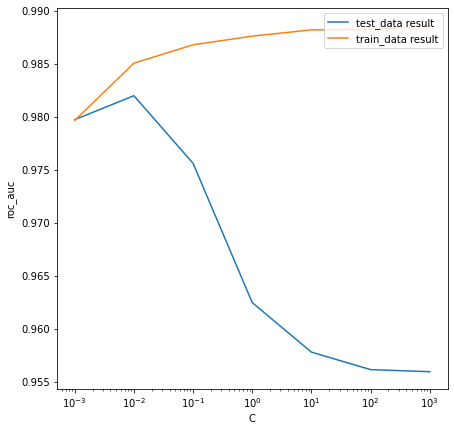

In [62]:
# C vs train and validation scores plotted

plt.figure(figsize=(7,7))
plt.plot(lr_us_cv_results['param_C'], lr_us_cv_results['mean_test_score'])
plt.plot(lr_us_cv_results['param_C'], lr_us_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test_data result', 'train_data result'], loc='upper right')
plt.xscale('log')

In [63]:
# Highest score with a C

lr_us_best_score = lr_us_model_cv.best_score_
lr_us_best_C = lr_us_model_cv.best_params_['C']

print(" The roc auc test's maximum score is {0} at C = {1}".format(lr_us_best_score, lr_us_best_C))

 The roc auc test's maximum score is 0.9819945756951934 at C = 0.01


### Logistic regression with optimum solution value of c which is 0.01

In [64]:


# Using the best C to instantiate the model.
logistic_us = LogisticRegression(C=0.01)

# Fitting the model on the train set data
logistic_undersample_model = logistic_us.fit(X_train_us, Y_train_us)


### Call the train_result function for diplaying result of logistic regression of undersample data

**********Confusion Matrix**********
[[297   5]
 [ 30 272]]


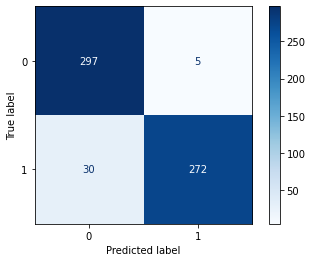

**********Classification_report**********
Accuracy:- 0.9420529801324503
Sensitivity:- 0.9006622516556292
Specificity:- 0.9834437086092715
F1-Score:- 0.9395509499136443
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       302
           1       0.98      0.90      0.94       302

    accuracy                           0.94       604
   macro avg       0.95      0.94      0.94       604
weighted avg       0.95      0.94      0.94       604

------------------ ROC --------------------


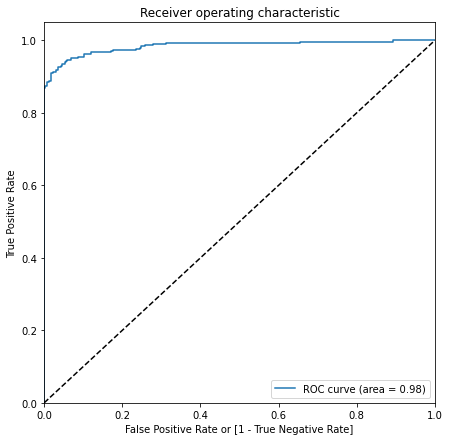

In [65]:
rus_train_modeling("Logistic Regression", logistic_undersample_model)

### call undersampling_test function

**********Confusion Matrix**********
[[49857   468]
 [    7    77]]


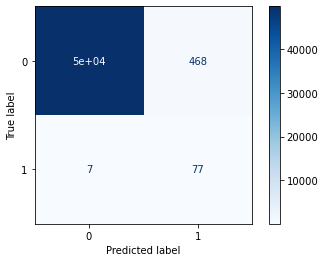

**********Classification_report**********
Accuracy:- 0.9905770794897737
Sensitivity:- 0.9166666666666666
Specificity:- 0.9907004470938897
F1-Score:- 0.24483306836248012
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50325
           1       0.14      0.92      0.24        84

    accuracy                           0.99     50409
   macro avg       0.57      0.95      0.62     50409
weighted avg       1.00      0.99      0.99     50409

**********ROC-AUC**********


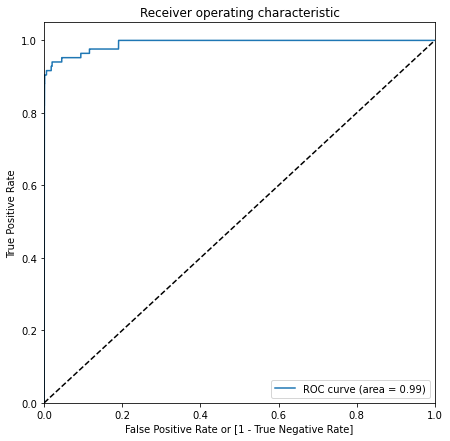

In [66]:
rus_test_modeling("Logistic Regression", logistic_undersample_model)

## Undersampling Decision tree

In [67]:


#The parameter grid's creation
parameter_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Construct the grid search model 
dt_us_model_cv = GridSearchCV(estimator = DecisionTreeClassifier(), 
                           param_grid = parameter_grid, 
                           scoring= 'roc_auc',
                           cv = sk_fold, 
                           verbose = 1)
# Fitting  the grid search for the data
dt_us_model_cv.fit(X_train_us,Y_train_us)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [68]:
# cross validation results for decision tree
dt_us_cv_results = pd.DataFrame(dt_us_model_cv.cv_results_)
dt_us_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004655,0.000231,0.003160,8.483513e-04,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.956573,0.975941,0.951337,0.961283,0.010582,3
1,0.005742,0.001074,0.002570,4.252886e-04,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.955887,0.976832,0.951337,0.961352,0.011103,2
2,0.006578,0.001434,0.004274,1.227641e-03,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.927997,0.941040,0.922970,0.930669,0.007615,5
3,0.004325,0.001860,0.003327,1.256584e-03,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.923390,0.941040,0.922970,0.929133,0.008421,6
4,0.003318,0.000466,0.001998,7.370010e-07,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.962063,0.975941,0.951139,0.963047,0.010149,1
5,0.003655,0.000476,0.001661,4.731957e-04,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.954808,0.971584,0.951931,0.959441,0.008666,4
6,0.002653,0.000481,0.001994,1.109607e-05,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.923390,0.941040,0.922970,0.929133,0.008421,6
7,0.002658,0.000468,0.001995,5.291962e-06,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.923390,0.941040,0.922970,0.929133,0.008421,6


In [69]:
# The best sensitivity score and hyperparameters are printed
print("Best roc_auc score is : ", dt_us_model_cv.best_score_)
print(dt_us_model_cv.best_estimator_)


Best roc_auc score is :  0.9630472502695815
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [70]:
# hyperparameter-optimal model
dtree_us_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 10,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dtree_us_model.fit(X_train_us, Y_train_us)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=10)

### Call the train_result function for displaying result of predection on train data

**********Confusion Matrix**********
[[292  10]
 [ 34 268]]


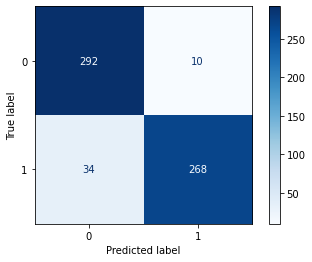

**********Classification_report**********
Accuracy:- 0.9271523178807947
Sensitivity:- 0.8874172185430463
Specificity:- 0.9668874172185431
F1-Score:- 0.9241379310344828
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       302
           1       0.96      0.89      0.92       302

    accuracy                           0.93       604
   macro avg       0.93      0.93      0.93       604
weighted avg       0.93      0.93      0.93       604

------------------ ROC --------------------


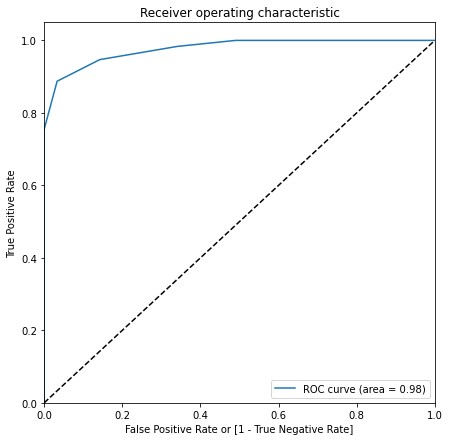

In [71]:
rus_train_modeling("Decision Tree",dtree_us_model)

### Call the test_result function for displaying result of predection on train data

**********Confusion Matrix**********
[[48747  1578]
 [    9    75]]


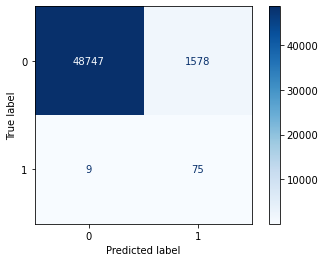

**********Classification_report**********
Accuracy:- 0.9685175266321491
Sensitivity:- 0.8928571428571429
Specificity:- 0.9686438152011922
F1-Score:- 0.08635578583765112
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     50325
           1       0.05      0.89      0.09        84

    accuracy                           0.97     50409
   macro avg       0.52      0.93      0.54     50409
weighted avg       1.00      0.97      0.98     50409

**********ROC-AUC**********


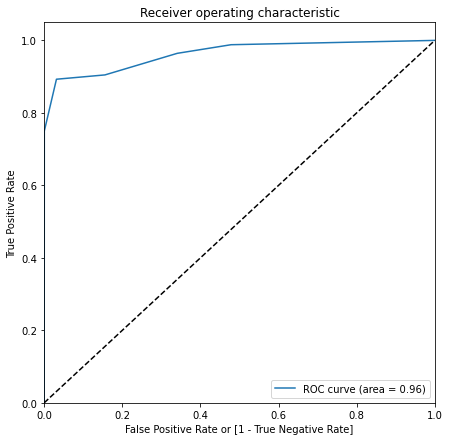

In [72]:
rus_test_modeling("Decision Tree",dtree_us_model)

## Undersampling XGBoost

In [73]:
   

# Establish the hyperparameter range
parameter_grid = {'learning_rate': [0.4, 0.8], 
             'subsample': [0.3, 0.6, 0.9]}          


# Emphasise the model
xgb_us_model = XGBClassifier(max_depth=3, n_estimators=300)

# configure GridSearchCV ()
xgb_us_model_cv = GridSearchCV(estimator = xgb_us_model, 
                        param_grid = parameter_grid, 
                        scoring= 'roc_auc', 
                        cv = sk_fold, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
xgb_us_model_cv.fit(X_train_us, Y_train_us)       


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_c...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=300, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'learning_rate': [0.4, 0.8],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [74]:
# Cross validation results for XGBoost model
xgb_us_cv_results = pd.DataFrame(xgb_us_model_cv.cv_results_)
xgb_us_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.163824,0.013784,0.004651,0.000470,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.976767,0.988119,0.974653,0.979846,0.005913,2,1.0,1.000000,1.0,1.000000,0.000000
1,0.167659,0.015230,0.005316,0.000470,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.976669,0.990990,0.972970,0.980210,0.007771,1,1.0,1.000000,1.0,1.000000,0.000000
2,0.169184,0.007405,0.005374,0.000552,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.974022,0.984257,0.975347,0.977875,0.004545,4,1.0,1.000000,1.0,1.000000,0.000000
3,0.149391,0.002342,0.005002,0.000026,0.8,0.3,"{'learning_rate': 0.8, 'subsample': 0.3}",0.970787,0.971287,0.962079,0.968051,0.004228,6,1.0,0.999458,1.0,0.999819,0.000255
4,0.152232,0.004001,0.005038,0.000370,0.8,0.6,"{'learning_rate': 0.8, 'subsample': 0.6}",0.971375,0.987624,0.975149,0.978049,0.006943,3,1.0,1.000000,1.0,1.000000,0.000000
5,0.170610,0.003201,0.005257,0.000565,0.8,0.9,"{'learning_rate': 0.8, 'subsample': 0.9}",0.973140,0.984356,0.969208,0.975568,0.006418,5,1.0,1.000000,1.0,1.000000,0.000000


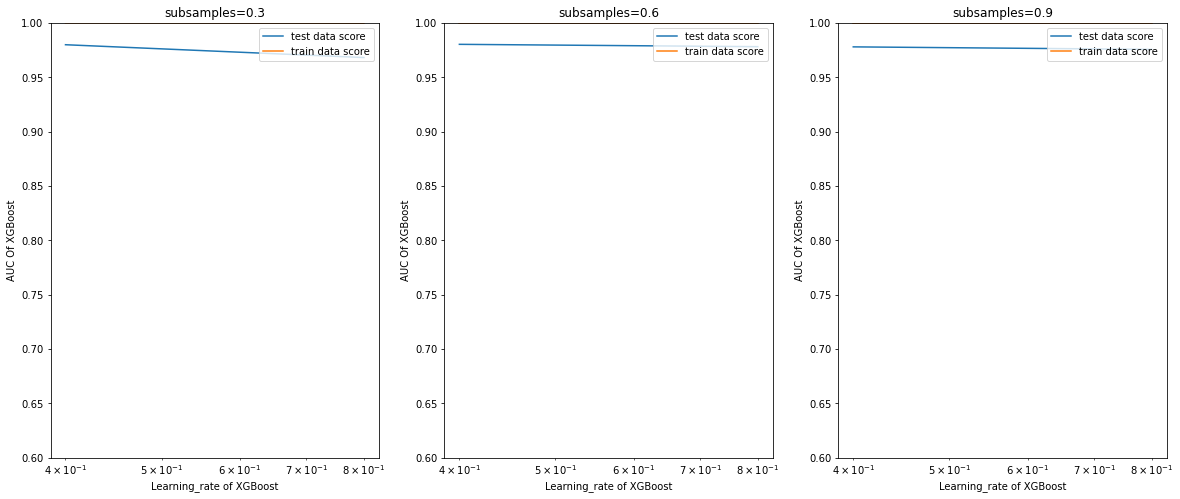

In [75]:

    
# Define the plot size 
plt.figure(figsize=(20,8))

parameter_grid = {'learning_rates': [0.2, 0.6], 
             'subsamples': [0.3, 0.6, 0.9]} 


for i, xgb_us_subsample in enumerate(parameter_grid['subsamples']):
    

    # plotting the subplot 
    plt.subplot(1,len(parameter_grid['subsamples']), i+1)
    creditcard_df = xgb_us_cv_results[xgb_us_cv_results['param_subsample']==xgb_us_subsample]

    plt.plot(creditcard_df["param_learning_rate"], creditcard_df["mean_test_score"])
    plt.plot(creditcard_df["param_learning_rate"], creditcard_df["mean_train_score"])
    plt.xlabel('Learning_rate of XGBoost')
    plt.ylabel('AUC Of XGBoost')
    plt.title("subsamples={0}".format(xgb_us_subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test data score', 'train data score'], loc='upper right')
    plt.xscale('log')  

In [76]:

xgb_us_model_cv.best_params_

{'learning_rate': 0.4, 'subsample': 0.6}

In [77]:

# specified hyperparameters
parameters = {'learning_rate': 0.4,
          'max_depth': 3, 
          'n_estimators':300,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fitting  the model on training data
xgb_us_model = XGBClassifier(params = parameters)
xgb_us_model.fit(X_train_us, Y_train_us)

[08:44:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 300,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor='auto', random_state=0, reg_alpha=0, ...)

### call undersampling_train function

**********Confusion Matrix**********
[[48879  1446]
 [    7    77]]


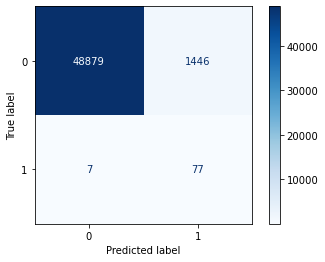

**********Classification_report**********
Accuracy:- 0.9711757821024023
Sensitivity:- 0.9166666666666666
Specificity:- 0.9712667660208644
F1-Score:- 0.09583074051026758
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     50325
           1       0.05      0.92      0.10        84

    accuracy                           0.97     50409
   macro avg       0.53      0.94      0.54     50409
weighted avg       1.00      0.97      0.98     50409

**********ROC-AUC**********


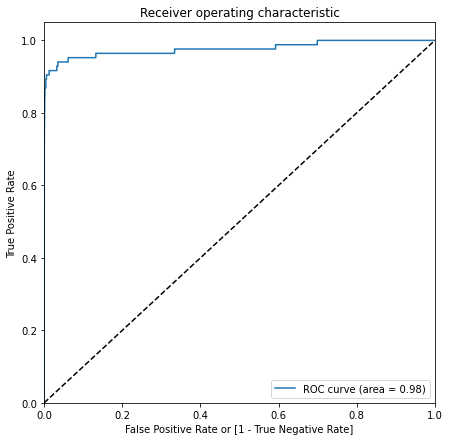

In [78]:
rus_test_modeling("XGBoost",xgb_us_model)

### call undersampling_train function

**********Confusion Matrix**********
[[302   0]
 [  0 302]]


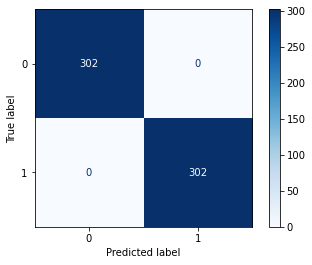

**********Classification_report**********
Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       302

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604

------------------ ROC --------------------


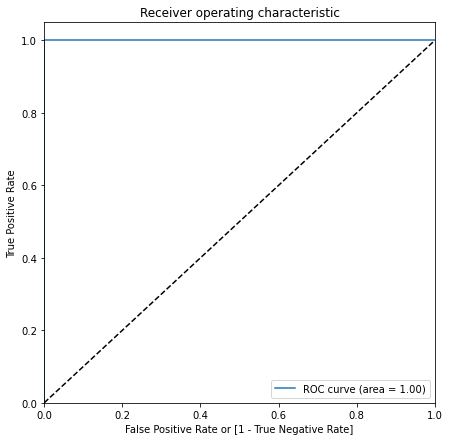

In [79]:
rus_train_modeling("XGBoost",xgb_us_model)

In [80]:
rus_train_results.sort_values(by='ROC', ascending=False)



,Model Name,Accuracy,F1-score,ROC
2,XGBoost,1.000000,1.000000,1.000000
0,Logistic Regression,0.942053,0.939551,0.984485
1,Decision Tree,0.927152,0.924138,0.976892


In [81]:
# Creating the dataframe for storing the results of undersampled dataset performance metrics of train data and test data
rus_test_results.sort_values(by='ROC', ascending=False)

,Model Name,Accuracy,F1-score,ROC
0,Logistic Regression,0.990577,0.244833,0.991711
2,XGBoost,0.971176,0.095831,0.977034
1,Decision Tree,0.968518,0.086356,0.963192


<AxesSubplot:xlabel='Model Name'>

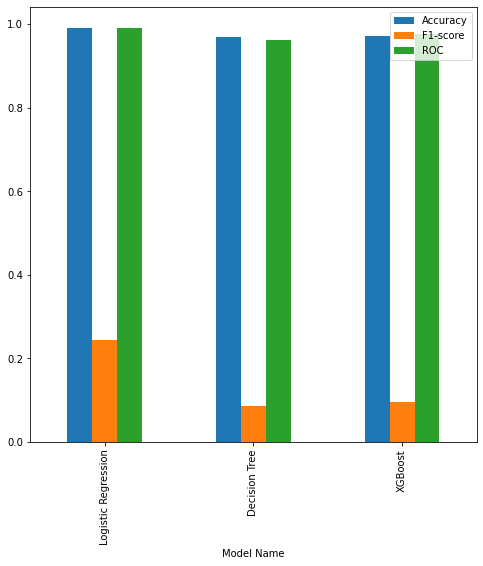

In [82]:


scores_df = pd.DataFrame(rus_test_results)
scores_df.plot(x='Model Name',kind='bar',figsize=(8, 8))



## Oversampling

Imbalanced dataset shape Is : Counter({0: 201330, 1: 302})
Undersampling dataset shape Is:  Counter({0: 201330, 1: 201330})


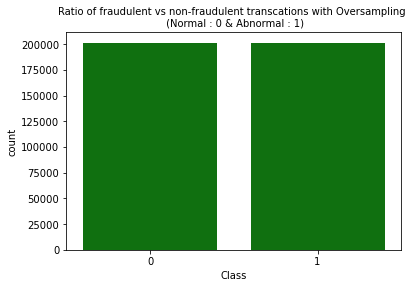

In [83]:
# Fitting the feature and target variable 
ro_sampling = RandomOverSampler(random_state=30)
X_train_os, Y_train_os = ro_sampling.fit_resample(X_train_data, Y_train_data)


print('Imbalanced dataset shape Is :', Counter(Y_train_data))
print('Undersampling dataset shape Is: ', Counter(Y_train_os))

#visualize the oversample data by countplot
oversample_df = pd.DataFrame(Y_train_os) 
sns.countplot(x='Class', data=oversample_df, color='g')
plt.title('Ratio of fraudulent vs non-fraudulent transcations with Oversampling \n (Normal : 0 & Abnormal : 1)', fontsize=10)
plt.show()


In [84]:
# Creating the dataframe for storing the results of undersampled dataset performance metrics of train data and test data
ros_train_results= pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])
ros_test_results=pd.DataFrame(columns=['Model Name','Accuracy','F1-score','ROC'])

### define the function for oversampling train

In [85]:
# Creating the dataframe for storing the results of undersampled dataset performance metrics of train data and test data
ros_train_results= pd.DataFrame(columns=['Model Name', 'Accuracy', 'F1-score', 'ROC'])
ros_test_results=pd.DataFrame(columns=['Model Name','Accuracy','F1-score','ROC'])

In [86]:
# Prepare results function
def ros_train_modeling(model_name,oversample_model):
    
    #Predictions on the train set
    Y_train_os_pred_data = oversample_model.predict(X_train_os)
    
    #Generating Confusion matrix
    
    print("**********Confusion Matrix**********")
    confusion_train_os = metrics.confusion_matrix(Y_train_os, Y_train_os_pred_data)
    print(confusion_train_os)
    
    # Displaying Confusion matrix
    cm_train_os = ConfusionMatrixDisplay(confusion_matrix=confusion_train_os)
    cm_train_os.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print("**********Classification_report**********")
    TP = confusion_train_os[1,1] 
    TN = confusion_train_os[0,0] 
    FP = confusion_train_os[0,1] 
    FN = confusion_train_os[1,0] 
    
    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_train_os, Y_train_os_pred_data))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_train_os, Y_train_os_pred_data))

    # classification_report
    print(classification_report(Y_train_os, Y_train_os_pred_data))
    
    # Predicted probability
    Y_train_pred_os_prob = oversample_model.predict_proba(X_train_os)[:,1]
    
     # roc_auc
    print("------------------ ROC --------------------")
    roc_auc = metrics.roc_auc_score(Y_train_os, Y_train_pred_os_prob)
    
    # Plot the ROC curve
    draw_roc(Y_train_os, Y_train_pred_os_prob)
    
    
    
    
    
    # Performance Evaluation metrics score in final result store for train data
    ros_train_results.loc[len(ros_train_results)] = [model_name, metrics.accuracy_score(Y_train_os, Y_train_os_pred_data), f1_score(Y_train_os, Y_train_os_pred_data), roc_auc]

    return None

### define the function for oversampling test

In [87]:
# Prepare results function
def ros_test_modeling(model_name,oversample_model):
    
    # Estimation of the test set data
    Y_test_os_pred_data = oversample_model.predict(X_test_data)
    
    # Generating Confusion matrix
    print("**********Confusion Matrix**********")
    confusion_test_os = metrics.confusion_matrix(Y_test_data, Y_test_os_pred_data)
    print(confusion_test_os)
    
    #Confusion Matrix Display
    cm_test_os = ConfusionMatrixDisplay(confusion_matrix=confusion_test_os)
    cm_test_os.plot(cmap=plt.cm.Blues)
    plt.show()
    
    print("**********Classification_report**********")
    TP = confusion_test_os[1,1] 
    TN = confusion_test_os[0,0] 
    FP = confusion_test_os[0,1] 
    FN = confusion_test_os[1,0] 

    # Accuracy
    print("Accuracy:-",metrics.accuracy_score(Y_test_data, Y_test_os_pred_data))

    # Sensitivity
    print("Sensitivity:-",TP / float(TP+FN))

    # Specificity
    print("Specificity:-", TN / float(TN+FP))

    # F1 score
    print("F1-Score:-", f1_score(Y_test_data, Y_test_os_pred_data))

    # generating classification_report
    print(classification_report(Y_test_data, Y_test_os_pred_data))
    
   # Predicted probability on test data
    Y_test_os_pred_prob = oversample_model.predict_proba(X_test_data)[:,1]
    
    
    # roc_auc
    print("**********ROC**********")
    roc_auc = metrics.roc_auc_score(Y_test_data, Y_test_os_pred_prob)
    
    
    # Plot the ROC curve
    draw_roc(Y_test_data, Y_test_os_pred_prob)
    
   
    
    
    
   # Performance Evaluation metrics score in final result store for test data
    ros_test_results.loc[len(ros_test_results)] = [model_name, metrics.accuracy_score(Y_test_data, Y_test_os_pred_data), f1_score(Y_test_data, Y_test_os_pred_data), roc_auc]

    return None

### Logistic regression

In [88]:
# Define the number of folds for cross validation
folds_number = 3

# Define the cross-validation
sk_fold = StratifiedKFold(n_splits=folds_number, shuffle=True, random_state=5)


In [89]:

# Identify the hyperparamaters
parameters = {"C": [0.001,0.01, 0.1, 1, 10, 100, 1000]}

scoring= {'AUC':'roc_auc', 'REC':'recall', 'PRE':'precision','ACC':'accuracy'}
# Define the Grid Search for predefined hyperparameters
lr_os_model_cv = GridSearchCV(estimator=LogisticRegression(),
                        param_grid = parameters, 
                        scoring= 'roc_auc', 
                        cv = sk_fold, 
                        verbose = 1,
                        return_train_score=True,
                        ) 
# Fit the logistic regression model
lr_os_model_cv.fit(X_train_os, Y_train_os)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [90]:


# Output of grid search CV
lr_os_cv_results = pd.DataFrame(lr_os_model_cv.cv_results_)
lr_os_cv_results



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.770057,0.372396,0.045589,0.003313,0.001,{'C': 0.001},0.987612,0.987864,0.988133,0.987870,0.000213,7,0.987927,0.987860,0.987902,0.987897,0.000028
1,1.966030,0.057828,0.041429,0.004041,0.01,{'C': 0.01},0.988219,0.988487,0.988735,0.988480,0.000211,6,0.988504,0.988472,0.988568,0.988515,0.000040
2,2.014374,0.170657,0.048493,0.001382,0.1,{'C': 0.1},0.988210,0.988743,0.989050,0.988668,0.000347,5,0.988467,0.988743,0.988882,0.988697,0.000173
3,1.874904,0.002926,0.044124,0.002316,1,{'C': 1},0.988585,0.989101,0.989118,0.988935,0.000247,1,0.988859,0.989089,0.988966,0.988971,0.000094
4,1.992791,0.029040,0.046392,0.002488,10,{'C': 10},0.988411,0.989004,0.988998,0.988804,0.000278,4,0.988676,0.988968,0.988868,0.988837,0.000121
5,1.920775,0.050250,0.040563,0.004529,100,{'C': 100},0.988562,0.989066,0.989097,0.988908,0.000245,2,0.988850,0.989034,0.988982,0.988955,0.000078
6,2.019662,0.081400,0.045612,0.006968,1000,{'C': 1000},0.988656,0.988985,0.988928,0.988856,0.000143,3,0.988917,0.988949,0.988777,0.988881,0.000075


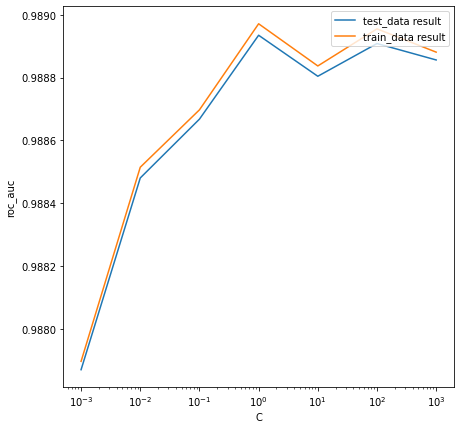

In [92]:

# C vs train and validation scores plotted

plt.figure(figsize=(7,7))
plt.plot(lr_os_cv_results['param_C'], lr_os_cv_results['mean_test_score'])
plt.plot(lr_os_cv_results['param_C'], lr_os_cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test_data result', 'train_data result'], loc='upper right')
plt.xscale('log')



In [93]:

# Highest score with a C

lr_os_best_score = lr_os_model_cv.best_score_
lr_os_best_C = lr_os_model_cv.best_params_['C']

print(" The roc auc test's maximum score is {0} at C = {1}".format(lr_os_best_score, lr_os_best_C))

 The roc auc test's maximum score is 0.9889348572271551 at C = 1


In [95]:

# Using the best C to instantiate the model.
logistic_os = LogisticRegression(C=1)

# Fitting the model on the train set data
logistic_oversample_model = logistic_os.fit(X_train_os, Y_train_os)


**********Confusion Matrix**********
[[197024   4306]
 [ 16681 184649]]


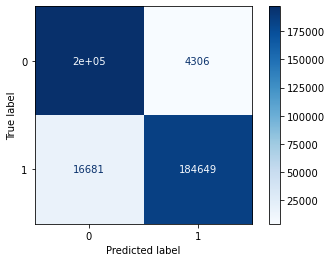

**********Classification_report**********
Accuracy:- 0.9478791039586748
Sensitivity:- 0.9171459792380668
Specificity:- 0.9786122286792828
F1-Score:- 0.9462264755242963
              precision    recall  f1-score   support

           0       0.92      0.98      0.95    201330
           1       0.98      0.92      0.95    201330

    accuracy                           0.95    402660
   macro avg       0.95      0.95      0.95    402660
weighted avg       0.95      0.95      0.95    402660

------------------ ROC --------------------


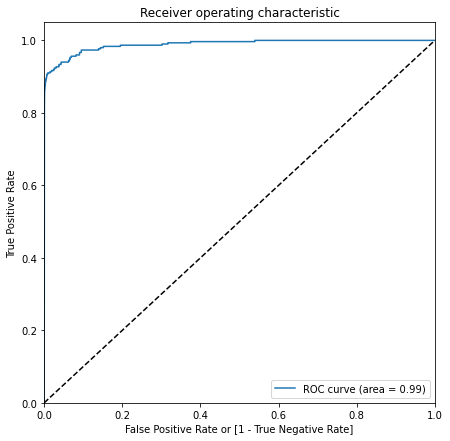

In [96]:
ros_train_modeling("Logistic Regression", logistic_oversample_model)

**********Confusion Matrix**********
[[49214  1111]
 [    5    79]]


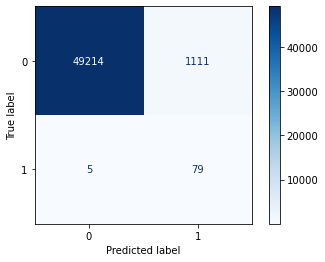

**********Classification_report**********
Accuracy:- 0.9778610962328156
Sensitivity:- 0.9404761904761905
Specificity:- 0.9779234972677595
F1-Score:- 0.1240188383045526
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50325
           1       0.07      0.94      0.12        84

    accuracy                           0.98     50409
   macro avg       0.53      0.96      0.56     50409
weighted avg       1.00      0.98      0.99     50409

**********ROC**********


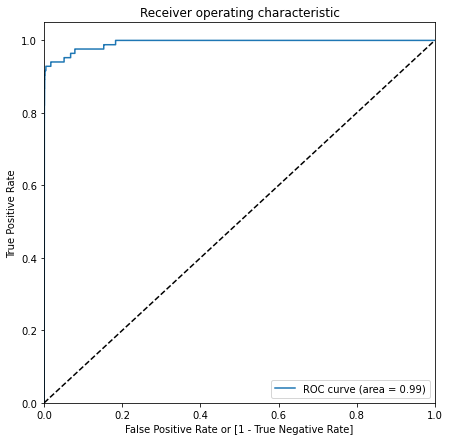

In [97]:
ros_test_modeling("Logistic Regression", logistic_oversample_model)

### decision tree

In [98]:

#The parameter grid's creation
parameter_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

#Construct the grid search model 
dt_os_model_cv = GridSearchCV(estimator = DecisionTreeClassifier(), 
                           param_grid = parameter_grid, 
                           scoring= 'roc_auc',
                           cv = sk_fold, 
                           verbose = 1)
# Fitting  the grid search for the data
dt_os_model_cv.fit(X_train_os,Y_train_os)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=5, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [99]:
# cross validation results for decision tree
dt_os_cv_results = pd.DataFrame(dt_os_model_cv.cv_results_)
dt_os_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.110748,0.193697,0.041254,0.002582,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.992326,0.992646,0.993109,0.992694,0.000322,5
1,3.015624,0.203021,0.040867,0.002442,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.992326,0.992646,0.993109,0.992694,0.000322,5
2,2.958163,0.070976,0.038538,0.001696,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.992251,0.992590,0.993059,0.992633,0.000332,7
3,3.107930,0.267786,0.045632,0.010346,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.992251,0.992590,0.993059,0.992633,0.000332,7
4,5.266822,0.152178,0.047490,0.005243,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999744,0.999586,0.999666,0.999666,0.000065,4
5,5.142439,0.194430,0.041532,0.002348,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999731,0.999558,0.999721,0.999670,0.000079,3
6,4.950106,0.178398,0.039534,0.000469,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999725,0.999628,0.999664,0.999672,0.000040,2
7,4.893202,0.218194,0.039849,0.001396,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999749,0.999616,0.999684,0.999683,0.000054,1


In [100]:
# The best sensitivity score and hyperparameters are printed
print("Best roc_auc score is : ", dt_os_model_cv.best_score_)
print(dt_os_model_cv.best_estimator_)


Best roc_auc score is :  0.9996829378108977
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [101]:
# hyperparameter-optimal model
dtree_os_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 10,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dtree_os_model.fit(X_train_us, Y_train_us)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=10)

**********Confusion Matrix**********
[[195004   6326]
 [ 22744 178586]]


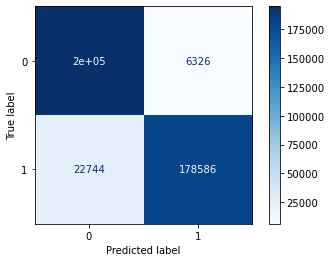

**********Classification_report**********
Accuracy:- 0.9278050961108628
Sensitivity:- 0.8870312422391099
Specificity:- 0.9685789499826156
F1-Score:- 0.9247363052179722
              precision    recall  f1-score   support

           0       0.90      0.97      0.93    201330
           1       0.97      0.89      0.92    201330

    accuracy                           0.93    402660
   macro avg       0.93      0.93      0.93    402660
weighted avg       0.93      0.93      0.93    402660

------------------ ROC --------------------


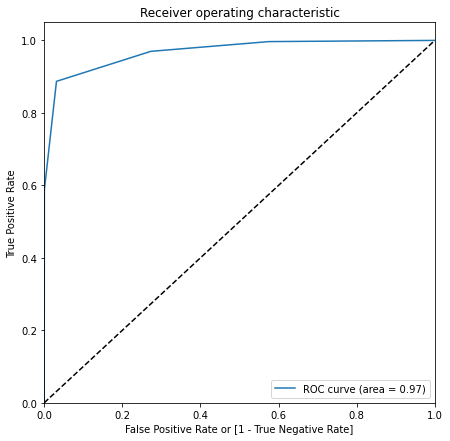

In [102]:
ros_train_modeling("Decision Tree",dtree_os_model)

**********Confusion Matrix**********
[[48747  1578]
 [    9    75]]


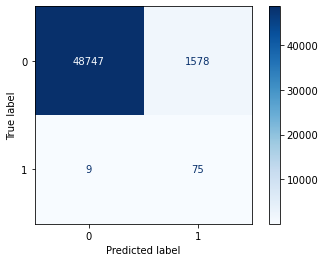

**********Classification_report**********
Accuracy:- 0.9685175266321491
Sensitivity:- 0.8928571428571429
Specificity:- 0.9686438152011922
F1-Score:- 0.08635578583765112
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     50325
           1       0.05      0.89      0.09        84

    accuracy                           0.97     50409
   macro avg       0.52      0.93      0.54     50409
weighted avg       1.00      0.97      0.98     50409

**********ROC**********


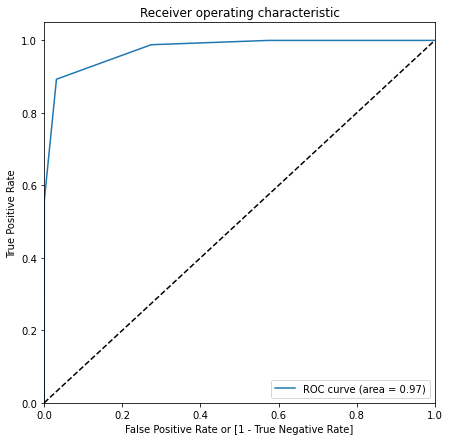

In [103]:
ros_test_modeling("Decision Tree",dtree_os_model)

## XGBoost

In [ ]:

# Establish the hyperparameter range
parameter_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# Emphasise the model
xgb_os_model = XGBClassifier(max_depth=2, n_estimators=200)

# configure GridSearchCV ()
xgb_os_model_cv = GridSearchCV(estimator = xgb_os_model, 
                        param_grid = parameter_grid, 
                        scoring= 'roc_auc', 
                        cv = sk_fold, 
                        verbose = 1,
                        return_train_score=True)      

# fitting the model
xgb_os_model_cv.fit(X_train_os, Y_train_os)       



Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
# Cross validation results for XGBoost model
xgb_os_cv_results = pd.DataFrame(xgb_os_model_cv.cv_results_)
xgb_os_cv_results

In [ ]:

# Define the plot size 
plt.figure(figsize=(20,8))

parameter_grid = {'learning_rates': [0.2, 0.6], 
             'subsamples': [0.3, 0.6, 0.9]} 


for i, xgb_os_subsample in enumerate(parameter_grid['subsamples']):
    

    # plotting the subplot 
    plt.subplot(1,len(parameter_grid['subsamples']), i+1)
    creditcard_df = xgb_os_cv_results[xgb_us_cv_results['param_subsample']==xgb_os_subsample]

    plt.plot(creditcard_df["param_learning_rate"], creditcard_df["mean_test_score"])
    plt.plot(creditcard_df["param_learning_rate"], creditcard_df["mean_train_score"])
    plt.xlabel('Learning_rate of XGBoost')
    plt.ylabel('AUC Of XGBoost')
    plt.title("subsamples={0}".format(xgb_os_subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test data score', 'train data score'], loc='upper right')
    plt.xscale('log')  

In [ ]:
xgb_os_model_cv.best_params_

In [ ]:

# specified hyperparameters
parameters = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fitting  the model on training data
xgb_os_model = XGBClassifier(params = parameters)
xgb_os_model.fit(X_train_os, Y_train_os)

In [ ]:
ros_train_modeling("XGBoost",xgb_os_model)

In [ ]:
ros_test_modeling("XGBoost",xgb_os_model)

In [ ]:
# Creating the dataframe for storing the results of undersampled dataset performance metrics of train data and test data
ros_train_results.sort_values(by='ROC', ascending=False)

In [ ]:
# Creating the dataframe for storing the results of undersampled dataset performance metrics of train data and test data
ros_test_results.sort_values(by='ROC', ascending=False)

In [ ]:
scores_df = pd.DataFrame(ros_test_results)
scores_df.plot(x='Model Name',kind='bar',figsize=(8, 8))


In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(feature_X, target_Y)
print(sorted(Counter(y_resampled).items()))